Entering the folder name: covid
Number of images in the folder is 375
Entering the folder name: normal
Number of images in the folder is 375
Entering the folder name: virus
Number of images in the folder is 394
Class labels mapping: {'covid': 0, 'normal': 1, 'virus': 2}


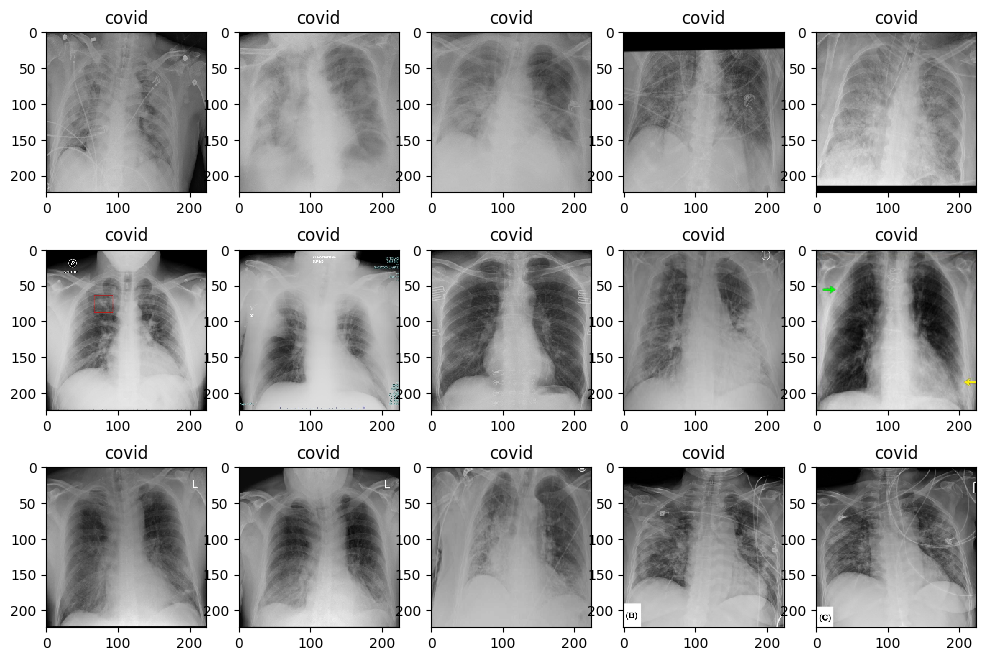

Entering the folder name: covid
Number of images in the folder is 125
Entering the folder name: normal
Number of images in the folder is 125
Entering the folder name: virus
Number of images in the folder is 125


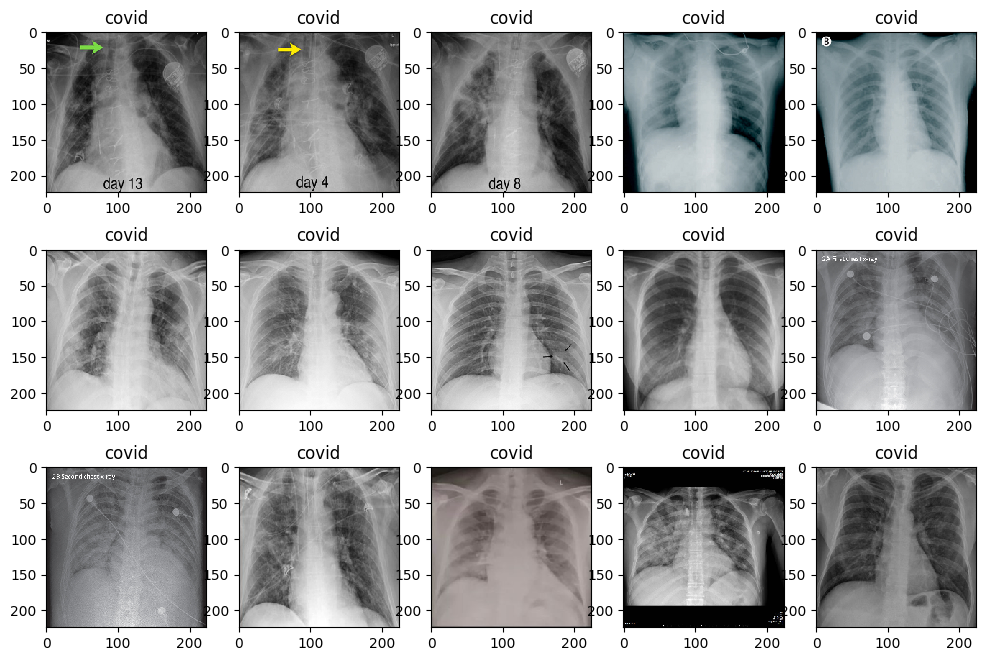

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model
import tensorflow as tf

trainpath = 'C:\\Users\\TSF\\Desktop\\Tapas\\covid\\data2\\train'#Please give the path where you are saving the train folder.
testpath = 'C:\\Users\\TSF\\Desktop\\Tapas\\covid\\data2\\test'#please give the path where you are saving the test folder.

with tf.device('/GPU:0'):
  new_size = 224
  train_images = []
  train_labels = []
  class_cancer = {'covid': 0, 'normal': 1, 'virus': 2}
  # Create a dictionary to map folder names to unique numerical labels
  class_cancer = {}
  current_label = 0

  for i in os.listdir(trainpath):  # entering train folder
    if os.path.isdir(os.path.join(trainpath, i)):
        print("Entering the folder name:", i)

        # Use glob to find .jpg, .jpeg, and .png files
        files = gb.glob(os.path.join(trainpath, i, '*.jpg'))
        files += gb.glob(os.path.join(trainpath, i, '*.jpeg'))
        files += gb.glob(os.path.join(trainpath, i, '*.png'))


        # Limit the number of images processed per folder
        # max_images_per_folder = 1500  # Specify the maximum number of images per folder
        # files = files[:max_images_per_folder]  # Slice to limit the number of files
        print("Number of images in the folder is", len(files))

        for j in files:# reading each images
            class_cancer = {'covid': 0, 'normal': 1, 'virus': 2}
            image_raw=cv2.imread(j)
            image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
            resize_image=cv2.resize(image,(new_size,new_size))
            train_images.append(list(resize_image))
            train_labels.append(class_cancer[i])

  print("Class labels mapping:", class_cancer)


  w=40
  h=30
  fig=plt.figure(figsize=(12, 8))
  columns = 5
  rows = 3

  for i in range(1, columns*rows +1):
      ax = fig.add_subplot(rows, columns, i)
      if train_labels[i] == 0:
          ax.title.set_text('covid')
      elif train_labels[i]==1:
          ax.title.set_text('normal')
      else:
          ax.title.set_text('virus')
      plt.imshow(train_images[i], interpolation='nearest')
  plt.show()


  new_size = 224
  test_images = []
  test_labels = []

  # Create a dictionary to map folder names to unique numerical labels (same as training)
  class_cancer = {'covid': 0, 'normal': 1, 'virus': 2}

  for i in os.listdir(testpath):  # entering the test folder
      if os.path.isdir(os.path.join(testpath, i)):
          print("Entering the folder name:", i)

          # Use glob to find .jpg, .jpeg, and .png files
          files = gb.glob(os.path.join(testpath, i, '*.jpg'))
          files += gb.glob(os.path.join(testpath, i, '*.jpeg'))
          files += gb.glob(os.path.join(testpath, i, '*.png'))


          # Limit the number of images processed per folder
          # max_images_per_folder = 150  # Specify the maximum number of images per folder
          # files = files[:max_images_per_folder]  # Slice to limit the number of files
          print("Number of images in the folder is", len(files))

          # Assign a unique label to each class if it's not already assigned
          for j in files:
            class_cancer = {'covid': 0, 'normal': 1, 'virus': 2}
            image_raw=cv2.imread(j)
            image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
            resize_image=cv2.resize(image,(new_size,new_size))
            test_images.append(list(resize_image))
            test_labels.append(class_cancer[i])

  # print("Class labels mapping for test data:", test_labels)


  w=40
  h=30
  fig=plt.figure(figsize=(12, 8))
  columns = 5
  rows = 3

  for i in range(1, columns*rows +1):
      ax = fig.add_subplot(rows, columns, i)
      if train_labels[i] == 0:
          ax.title.set_text('covid')
      elif train_labels[i]==1:
          ax.title.set_text('normal')
      else:
          ax.title.set_text('virus')
      plt.imshow(test_images[i], interpolation='nearest')
  plt.show()

  def list_to_array_train(train_images,train_labels):
    return np.array(train_images),np.array(train_labels)

  X_train,y_train=list_to_array_train(train_images,train_labels)


  def list_to_array_test(test_images,test_labels):
    return np.array(test_images),np.array(test_labels)


  X_test,y_test=list_to_array_test(test_images,test_labels)

  def keras_to_categorical(y_train,y_test):
    return to_categorical(y_train),to_categorical(y_test)
  y_train1=y_train
  y_test1=y_test
  y_train,y_test=keras_to_categorical(y_train,y_test)


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input
from keras import backend as K
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Function to create AlexNet model for feature extraction
def model_alexnet():
    input_shape = (224, 224, 3)
    inputs = Input(shape=input_shape)

    # First Convolutional Layer
    x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Second Convolutional Layer
    x = Conv2D(256, (5, 5), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Third Convolutional Layer
    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)

    # Fourth Convolutional Layer
    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)

    # Fifth Convolutional Layer
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Feature Extraction Layer
    feature = GlobalAveragePooling2D()(x)

    # Create the model
    model = Model(inputs=inputs, outputs=feature)

    return model

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")
    
    model_FE_alexnet = model_alexnet()
    model_FE_alexnet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    train_feature_alexnet = model_FE_alexnet.predict(X_train)
    test_feature_alexnet = model_FE_alexnet.predict(X_test)
    
    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)
    
    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }
    
    for clf_name, clf in classifiers.items():
        if clf_name in ["DecisionTreeClassifier", "RandomForest", "SVM"]:
            with tf.device('/GPU:0'):
                clf.fit(train_feature_alexnet, y_train_single)
                train_pred = clf.predict(train_feature_alexnet)
                test_pred = clf.predict(test_feature_alexnet)
        else:
            clf.fit(train_feature_alexnet, y_train_single)
            train_pred = clf.predict(train_feature_alexnet)
            test_pred = clf.predict(test_feature_alexnet)
        
        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }
        
        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('alexnet_model_evaluation_results.xlsx', index=False)
print("Results saved to alexnet_model_evaluation_results.xlsx")


Run 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Run 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Run 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Run 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Run 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Run 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Run 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Run 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Run 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Run 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Results saved to alexnet_model_evaluation_results.xlsx


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

weights_path = "mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5"

# Function to create MobileNetV2 model for feature extraction
def model_mobilenetv2():
    mobilenet_model = MobileNetV2(weights=weights_path, include_top=False, input_shape=(224, 224, 3))
    for layer in mobilenet_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(mobilenet_model.output)
    model = Model(inputs=mobilenet_model.input, outputs=feature)
    return model

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")
    
    model_FE_mobilenetv2 = model_mobilenetv2()
    model_FE_mobilenetv2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    train_feature_mobilenetv2 = model_FE_mobilenetv2.predict(X_train)
    test_feature_mobilenetv2 = model_FE_mobilenetv2.predict(X_test)
    
    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)
    
    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }
    
    for clf_name, clf in classifiers.items():
        if clf_name in ["DecisionTreeClassifier", "RandomForest", "SVM"]:
            with tf.device('/GPU:0'):
                clf.fit(train_feature_mobilenetv2, y_train_single)
                train_pred = clf.predict(train_feature_mobilenetv2)
                test_pred = clf.predict(test_feature_mobilenetv2)
        else:
            clf.fit(train_feature_mobilenetv2, y_train_single)
            train_pred = clf.predict(train_feature_mobilenetv2)
            test_pred = clf.predict(test_feature_mobilenetv2)
        
        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }
        
        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('mobilenetv2_model_evaluation_results.xlsx', index=False)
print("Results saved to mobilenetv2_model_evaluation_results.xlsx")


Run 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step
Run 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step
Run 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step
Run 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step
Run 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step
Run 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step
Run 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step
Run 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step
Run 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step
Run 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step
Results saved to mobilenetv2_model_evaluation_results.xlsx


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

weights_path = "densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Function to create DenseNet201 model for feature extraction
def model_densenet201():
    DenseNet_model = DenseNet201(weights=weights_path, include_top=False, input_shape=(224, 224, 3))
    for layer in DenseNet_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(DenseNet_model.output)
    model = Model(inputs=DenseNet_model.input, outputs=feature)
    return model

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")
    
    model_FE_densenet201 = model_densenet201()
    model_FE_densenet201.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])
    
    train_features_densenet201 = model_FE_densenet201.predict(X_train)
    test_features_densenet201 = model_FE_densenet201.predict(X_test)
    
    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)
    
    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }
    
    for clf_name, clf in classifiers.items():
        if clf_name in ["DecisionTreeClassifier", "RandomForest", "SVM"]:
            with tf.device('/GPU:0'):
                clf.fit(train_features_densenet201, y_train_single)
                train_pred = clf.predict(train_features_densenet201)
                test_pred = clf.predict(test_features_densenet201)
        else:
            clf.fit(train_features_densenet201, y_train_single)
            train_pred = clf.predict(train_features_densenet201)
            test_pred = clf.predict(test_features_densenet201)
        
        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }
        
        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('densenet201_model_evaluation_results.xlsx', index=False)
print("Results saved to densenet201_model_evaluation_results.xlsx")


Run 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Run 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
Run 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
Run 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
Run 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
Run 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step
Results saved to densenet201_model_evaluation_results.xlsx


In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

weights_path = "inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Function to create InceptionV3 model for feature extraction
def model_googlenet():
    Inception_model = InceptionV3(weights=weights_path, include_top=False, input_shape=(224, 224, 3))
    for layer in Inception_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(Inception_model.output)
    model = Model(inputs=Inception_model.input, outputs=feature)
    return model

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")
    
    model_FE_googlenet = model_googlenet()
    model_FE_googlenet.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])
    
    train_features_googlenet = model_FE_googlenet.predict(X_train)
    test_features_googlenet = model_FE_googlenet.predict(X_test)
    
    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)
    
    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }
    
    for clf_name, clf in classifiers.items():
        if clf_name in ["DecisionTreeClassifier", "RandomForest", "SVM"]:
            with tf.device('/GPU:0'):
                clf.fit(train_features_googlenet, y_train_single)
                train_pred = clf.predict(train_features_googlenet)
                test_pred = clf.predict(test_features_googlenet)
        else:
            clf.fit(train_features_googlenet, y_train_single)
            train_pred = clf.predict(train_features_googlenet)
            test_pred = clf.predict(test_features_googlenet)
        
        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }
        
        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('googlenet_model_evaluation_results.xlsx', index=False)
print("Results saved to googlenet_model_evaluation_results.xlsx")


Run 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 433ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step
Run 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 386ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 353ms/step
Run 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 401ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step
Run 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 426ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step
Run 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 414ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step
Run 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 447ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 396ms/step
Run 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 433ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 392ms/step
Run 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 416ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step
Run 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 423ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step
Run 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 435ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step
Results saved to googlenet_model_evaluation_results.xlsx


In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Function to create ResNet50 model for feature extraction
def model_resnet50_feature_extraction():
    ResNet50_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
    ResNet50_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')  # Change the path accordingly

    for layer in ResNet50_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(ResNet50_model.output)
    output = Model(inputs=ResNet50_model.input, outputs=feature)
    return output

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")
    
    with tf.device('/GPU:0'):
        model_FE_ResNet50 = model_resnet50_feature_extraction()
        model_FE_ResNet50.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])
        
        train_feature_resnet50 = model_FE_ResNet50.predict(X_train)
        test_feature_resnet50 = model_FE_ResNet50.predict(X_test)
    
    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)
    
    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }
    
    for clf_name, clf in classifiers.items():
        if clf_name in ["DecisionTreeClassifier", "RandomForest", "SVM"]:
            with tf.device('/GPU:0'):
                clf.fit(train_feature_resnet50, y_train_single)
                train_pred = clf.predict(train_feature_resnet50)
                test_pred = clf.predict(test_feature_resnet50)
        else:
            clf.fit(train_feature_resnet50, y_train_single)
            train_pred = clf.predict(train_feature_resnet50)
            test_pred = clf.predict(test_feature_resnet50)
        
        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }
        
        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('resnet50_model_evaluation_results.xlsx', index=False)
print("Results saved to resnet50_model_evaluation_results.xlsx")


Run 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 638ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 595ms/step
Run 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 628ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 593ms/step
Run 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 632ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 596ms/step
Run 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 636ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 606ms/step
Run 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 631ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 589ms/step
Run 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 616ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 583ms/step
Run 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 615ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 580ms/step
Run 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 618ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 582ms/step
Run 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 623ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 588ms/step
Run 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 623ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 586ms/step
Results saved to resnet50_model_evaluation_results.xlsx


In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.applications import EfficientNetB0
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Function to extract features using EfficientNet
def model_efficientnet_feature_extraction():
    EfficientNet_model = EfficientNetB0(weights=None, include_top=False, input_shape=(224, 224, 3))
    EfficientNet_model.load_weights('efficientnetb0_notop.h5')  # Change the path accordingly

    for layer in EfficientNet_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(EfficientNet_model.output)
    output = Model(inputs=EfficientNet_model.input, outputs=feature)
    return output

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")
    
    model_FE_EfficientNet = model_efficientnet_feature_extraction()
    model_FE_EfficientNet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    train_feature_efficientnet = model_FE_EfficientNet.predict(X_train)
    test_feature_efficientnet = model_FE_EfficientNet.predict(X_test)
    
    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)
    
    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }
    
    for clf_name, clf in classifiers.items():
        if clf_name in ["DecisionTreeClassifier", "RandomForest", "SVM"]:
            with tf.device('/GPU:0'):
                clf.fit(train_feature_efficientnet, y_train_single)
                train_pred = clf.predict(train_feature_efficientnet)
                test_pred = clf.predict(test_feature_efficientnet)
        else:
            clf.fit(train_feature_efficientnet, y_train_single)
            train_pred = clf.predict(train_feature_efficientnet)
            test_pred = clf.predict(test_feature_efficientnet)
        
        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }
        
        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('efficientNet_model_evaluation_results.xlsx', index=False)
print("Results saved to model_evaluation_results.xlsx")


Run 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 351ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 317ms/step
Run 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 344ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step
Run 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 351ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step
Run 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 344ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step
Run 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step
Run 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 331ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step
Run 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 337ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step
Run 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 334ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step
Run 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 322ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step
Run 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 320ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step
Results saved to model_evaluation_results.xlsx


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Function to create VGG19 model for feature extraction
def model_vgg19():
    VGG_model = VGG19(weights='vgg19_weights.h5', include_top=False, input_shape=(224, 224, 3))
    for layer in VGG_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(VGG_model.output)
    output = Model(inputs=VGG_model.input, outputs=feature)
    return output

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")
    
    with tf.device('/GPU:0'):
        model_FE_19 = model_vgg19()
        model_FE_19.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
        
        train_feature_19 = model_FE_19.predict(X_train)
        test_feature_19 = model_FE_19.predict(X_test)
    
    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)
    
    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }
    
    for clf_name, clf in classifiers.items():
        if clf_name in ["DecisionTreeClassifier", "RandomForest", "SVM"]:
            with tf.device('/GPU:0'):
                clf.fit(train_feature_19, y_train_single)
                train_pred = clf.predict(train_feature_19)
                test_pred = clf.predict(test_feature_19)
        else:
            clf.fit(train_feature_19, y_train_single)
            train_pred = clf.predict(train_feature_19)
            test_pred = clf.predict(test_feature_19)
        
        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }
        
        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('vgg19_model_evaluation_results.xlsx', index=False)
print("Results saved to vgg19_model_evaluation_results.xlsx")


Run 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Run 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Run 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Run 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Run 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Run 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Run 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Run 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Run 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Run 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Results saved to vgg19_model_evaluation_results.xlsx


In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Function to create VGG16 model for feature extraction
def model_vgg16():
    VGG_model = VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224, 224, 3))
    for layer in VGG_model.layers:
        layer.trainable = False
    feature = GlobalAveragePooling2D()(VGG_model.output)
    output = Model(inputs=VGG_model.input, outputs=feature)
    return output

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")
    
    with tf.device('/GPU:0'):
        model_FE_16 = model_vgg16()
        model_FE_16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        train_feature_16 = model_FE_16.predict(X_train)
        test_feature_16 = model_FE_16.predict(X_test)
    
    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)
    
    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }
    
    for clf_name, clf in classifiers.items():
        clf.fit(train_feature_16, y_train_single)
        train_pred = clf.predict(train_feature_16)
        test_pred = clf.predict(test_feature_16)
        
        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }
        
        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('vgg16_model_evaluation_results.xlsx', index=False)
print("Results saved to vgg16_model_evaluation_results.xlsx")


Run 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Run 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Results saved to vgg16_model_evaluation_results.xlsx


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from skimage.feature import local_binary_pattern
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Function to extract LBP features
def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        lbp = local_binary_pattern(img, P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp, bins=np.arange(0, 10), range=(0, 9))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)  # Normalize the histogram
        lbp_features.append(hist)
    return np.array(lbp_features)

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")

    with tf.device('/GPU:0'):
        X_train_lbp = extract_lbp_features(X_train)
        X_test_lbp = extract_lbp_features(X_test)

    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)

    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }

    for clf_name, clf in classifiers.items():
        clf.fit(X_train_lbp, y_train_single)
        train_pred = clf.predict(X_train_lbp)
        test_pred = clf.predict(X_test_lbp)

        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }

        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('lbp_model_evaluation_results.xlsx', index=False)
print("Results saved to lbp_model_evaluation_results.xlsx")


Run 1/10
Run 2/10
Run 3/10
Run 4/10
Run 5/10
Run 6/10
Run 7/10
Run 8/10
Run 9/10
Run 10/10
Results saved to lbp_model_evaluation_results.xlsx


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from skimage.feature import hog
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Function to extract HOG features
def extract_hog_features(images):
    hog_features = []
    for img in images:
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        feature, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
        hog_features.append(feature)
    return np.array(hog_features)

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")

    with tf.device('/GPU:0'):
        X_train_hog = extract_hog_features(X_train)
        X_test_hog = extract_hog_features(X_test)

    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)

    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }

    for clf_name, clf in classifiers.items():
        clf.fit(X_train_hog, y_train_single)
        train_pred = clf.predict(X_train_hog)
        test_pred = clf.predict(X_test_hog)

        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }

        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('hog_model_evaluation_results.xlsx', index=False)
print("Results saved to hog_model_evaluation_results.xlsx")


Run 1/10


In [3]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Function to extract SIFT features
def extract_sift_features(images, max_features=128):
    sift = cv2.SIFT_create()
    sift_features = []
    for img in images:
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(img, None)
        if descriptors is not None:
            descriptors = descriptors.flatten()
            if len(descriptors) < max_features:
                descriptors = np.pad(descriptors, (0, max_features - len(descriptors)), 'constant')
            else:
                descriptors = descriptors[:max_features]
        else:
            descriptors = np.zeros(max_features)
        sift_features.append(descriptors)
    return np.array(sift_features)

# Variables to store the results
results = []

for i in range(10):
    print(f"Run {i+1}/10")

    with tf.device('/GPU:0'):
        X_train_sift = extract_sift_features(X_train)
        X_test_sift = extract_sift_features(X_test)

    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)

    classifiers = {
        "KNN": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC()
    }

    for clf_name, clf in classifiers.items():
        clf.fit(X_train_sift, y_train_single)
        train_pred = clf.predict(X_train_sift)
        test_pred = clf.predict(X_test_sift)

        result = {
            "Classifier": clf_name,
            "Run": i+1,
            "Train Accuracy": accuracy_score(train_pred, y_train_single),
            "Test Accuracy": accuracy_score(test_pred, y_test_single),
            "Train Precision": precision_score(y_train_single, train_pred, average='macro'),
            "Test Precision": precision_score(y_test_single, test_pred, average='macro'),
            "Train F1 Score": f1_score(y_train_single, train_pred, average='macro'),
            "Test F1 Score": f1_score(y_test_single, test_pred, average='macro'),
            "Train Recall": recall_score(y_train_single, train_pred, average='macro'),
            "Test Recall": recall_score(y_test_single, test_pred, average='macro')
        }

        results.append(result)

# Convert results to a DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel('sift_model_evaluation_results.xlsx', index=False)
print("Results saved to sift_model_evaluation_results.xlsx")


Run 1/10


c:\Users\TSF\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\TSF\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\TSF\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\TSF\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:

Run 2/10
Run 3/10


KeyboardInterrupt: 